In [1]:
# Lab | Cleaning numerical data
# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in 
#files_for_lab folder.

# Context
# An auto insurance company has collected some data about its customers 
#including their demographics, education, employment, policy details, 
#vehicle information on which insurance policy is, and claim amounts. 
#You will help the senior management with some business questions 
#that will help them to better understand their customers, 
#improve their services, and improve profitability.

# Some business Objectives:

# Retain customers,
# Analyze relevant customer data,
# Develop focused customer retention programs.
# Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


In [2]:
# Instructions
# 1 Import the necessary libraries.
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3 First look at its main features (head, shape, info).

# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

# 5 Change effective to date column to datetime format.

# 6 Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

# 7 Plot a correlation matrix, comment what you see.

# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

# 9 Comment what you can see in the plots.

# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

# 11 Did you find outliers? Comment what you will do with them.

# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [3]:
# 1 Import the necessary libraries.

# pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# 1 Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# 3 First look at its main features (head, shape, info).
# https://stackoverflow.com/questions/65678976/showing-df-info-df-head-df-shape-df-dtypes-in-one-step
data.shape

(9134, 24)

In [7]:
# 3 First look at its main features (head, shape, info).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
# This code takes the columns of a pandas dataframe (data) and converts each column name 
#to lowercase and replaces any spaces with underscores, 
#then updates the dataframe's columns with these new names. 
#The final line returns the list of updated column names.
# https://stackoverflow.com/questions/74643621/convert-dataframe-column-names-from-camel-case-to-snake-case
# https://stackoverflow.com/questions/62910783/for-i-in-rangelen-and-regex
numeric_cols = []
for i in range(len(data.columns)):
    numeric_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = numeric_cols
numeric_cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [9]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
# 5 Change effective to date column to datetime format.

In [11]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# This line of code takes a column in a pandas dataframe (data) with the name 
#"effective_to_date" and converts its values to datetime type using 
#the pd.to_datetime() function from the pandas library.

In [12]:
display(data.shape)
data.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [13]:
# 6 Define a function that differentiates between continuous and discrete variables. 

In [14]:
# 6 Define a function that differentiates between continuous and discrete 
#variables. 
# Separating numericals and catagoricals

In [15]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# To select strings you must use the object dtype, but note that this will return all object dtype columns
# The meaning of the function is to select only those columns from the data that have "object" data type and
# return a dataframe containing those columns. 
#The argument include=object specifies that the function should 
#only include columns with the data type "object".

In [16]:
# 6 Define a function that differentiates between continuous and discrete variables. 
categorical = data.select_dtypes(include=object)

In [17]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# The meaning of the function is to select only those columns from the data that have numerical data types (integers and floating point numbers), and return a dataframe containing those columns. The argument include=np.number specifies that the function should only include columns with numerical data types. The numpy library (importable as np) is used to specify the numerical data types.

In [18]:
# 6 Define a function that differentiates between continuous and discrete variables. 
numerical = data.select_dtypes(include=np.number)

In [19]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# The code display the number of unique values in each column of the numerical dataframe, and displays information about the dataframe, including the data type and number of non-null values for each column.
# The numerical.nunique() function returns a Series object that shows the number of unique values in each column of the numerical dataframe.
# The numerical.info() function provides a summary of the information about the numerical dataframe, including the data type, number of non-null values, and memory usage for each column.

In [20]:
# 6 Define a function that differentiates between continuous and discrete variables. 
display(numerical.nunique())
numerical.info()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
# https://www.w3resource.com/pandas/dataframe/dataframe-info.php
# https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [21]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# The following code:
# Loops through each column in the numerical dataframe.
# For each column, it prints the number of unique values in that column by using the len(df[col].unique()) expression.
# The data.shape[0] * 0.02 expression calculates and displays the result of multiplying the number of rows in the df dataframe by 0.02.
# So, this code could be used to understand the number of unique values in each column of the numerical dataframe and to calculate a threshold value that could be used to identify columns with many unique values.
#https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
# https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0


In [22]:
# the threshold between continous and discrete variables was discussed during the lessons with teaching staff.

In [23]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# # the threshold between continous and discrete variables was discussed during the lessons with teaching staff: 2 %
for col in numerical.columns:
    print(len(data[col].unique()))
display(data.shape[0] * 0.02)

8041
5694
202
36
100
6
9
5106


182.68

In [24]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# Initializing two empty lists discrete_lst and continuous_lst.
# Loops through each column in the numerical dataframe.
# For each column, it compares the number of unique values in that column to the threshold value calculated in the previous step (data.shape[0] * 0.02).
# If the number of unique values is less than the threshold, the column is added to the discrete_lst.
# If the number of unique values is greater than or equal to the threshold, the column is added to the continuous_lst.
# Finally, both the discrete_lst and continuous_lst are displayed.
# So, this code is used to separate numerical columns in the numerical dataframe into two groups, one group with columns having many unique values (continuous_lst) and another group with columns having few unique values (discrete_lst). These groupings could are useful for determining which numerical columns to use as features in a machine learning model.

In [25]:
# 6 Define a function that differentiates between continuous and discrete variables. 
discrete_list = []
continuous_list = []
for col in numerical.columns:
    if len(data[col].unique()) < (data.shape[0] * 0.02):
        discrete_list.append(col)
    else:
        continuous_list.append(col)
display(discrete_list)
display(continuous_list)

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [26]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# The code defines a function discrete_continuous(data) 
#that takes a dataframe data as input. The function:

# Initializes two empty lists discrete_lst and continuous_lst.
# Loops through each column in the input data dataframe.
# For each column, it compares the number of unique values 
#in that column to the threshold value calculated as data.shape[0] * 0.02.
# If the number of unique values is less than the threshold, 
#the column is added to the discrete_lst.
# If the number of unique values is greater than or equal to 
#the threshold, the column is added to the continuous_lst.
# Finally, the function returns a tuple of both the discrete_lst 
#and continuous_lst lists.
# So, this code could be used to define a reusable function that 
#takes a dataframe as input and separates its columns into two groups, 
#one group with columns having many unique values and 
#another group with columns having few unique values. 
#The grouping could be useful for determining which columns 
#to use as features in a machine learning model.

In [27]:
# 6 Define a function that differentiates between continuous and discrete variables. 
def discrete_continuous(data):
    discrete_list = []
    continuous_list = []
    for col in data.columns:
        if len(data[col].unique()) < (data.shape[0] * 0.02):
            discrete_list.append(col)
        else:
            continuous_list.append(col)
    return (discrete_list, continuous_list)

In [28]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# The code calls the discrete_continuous(numerical) function with the 
#numerical dataframe as input and assigns the returned tuple to 
#two separate variables, discrete_lst and continuous_lst.
# So, this code could be used to separate the numerical columns 
#in the numerical dataframe into two groups, one group with 
#columns having many unique values (continuous_lst) and 
#another group with columns having few unique values (discrete_lst). 
#These groupings could be useful for determining which 
#numerical columns to use as features in a machine learning model.

In [29]:
# 6 Define a function that differentiates between continuous and discrete variables. 
discrete_list, continuous_list = discrete_continuous(numerical)


In [30]:
print(discrete_list)
print(continuous_list)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [31]:
# 7 Plot a correlation matrix, comment what you see.
# The code calculates the pairwise correlation between columns 
#in the data dataframe and assigns the result to a variable correlations. 
#The second line of code correlation is an incomplete statement, 
#it does not do anything.
# So, the correlations variable would contain a matrix of the 
#Pearson correlation coefficients between all pairs of columns 
#in the data dataframe. This matrix could be used to identify 
#highly correlated columns, which might need to be removed from 
#the dataset to improve the performance of machine learning models.
# https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

In [32]:
# 7 Plot a correlation matrix, comment what you see.
correlations = data.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [33]:
# 7 Plot a correlation matrix, comment what you see.
# The code generates a heatmap of the correlations matrix using the sns.heatmap function from the seaborn library. It sets the size of the plot to (11,9) and sets the annot argument to True to show the correlation coefficient values as annotations on the plot. The plt.show() function is then used to display the plot.
# Code visualizes the pairwise correlations between columns in the data dataframe as a heatmap, making it easier to see patterns in the correlations and identify highly correlated columns.

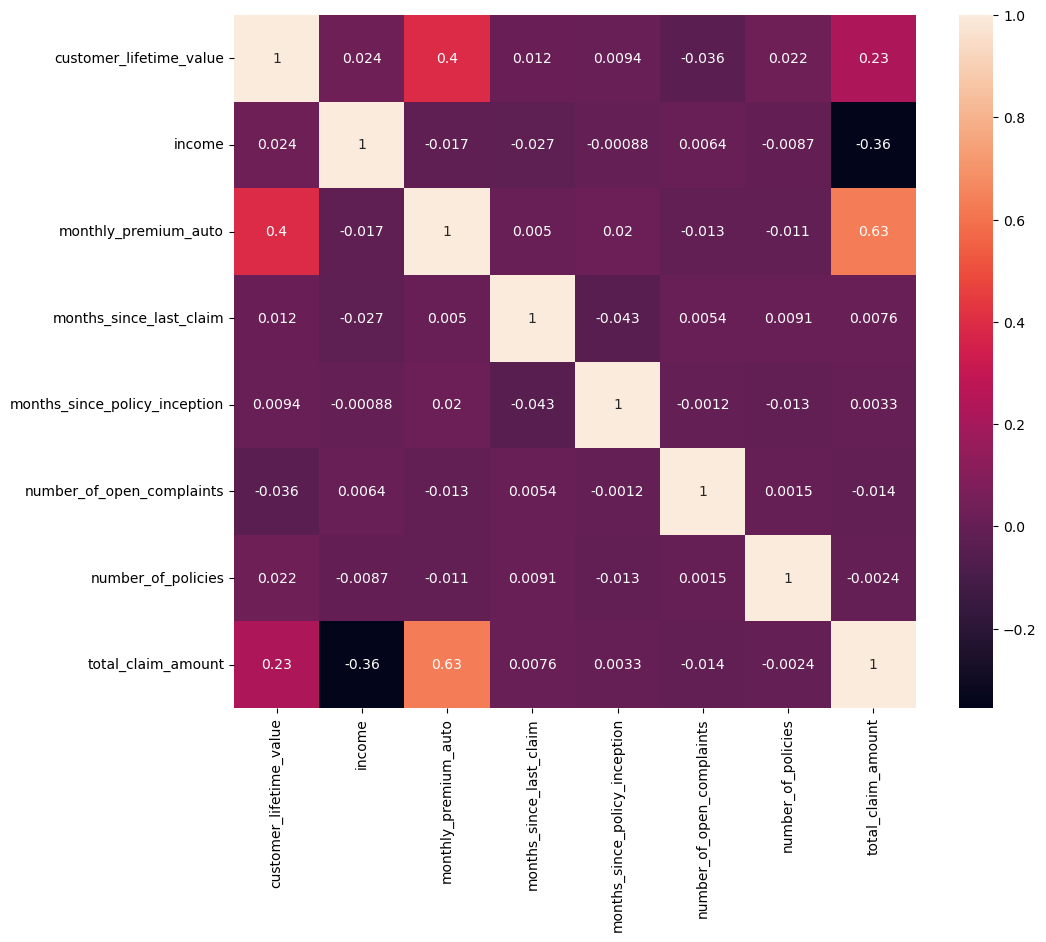

In [34]:
# 7 Plot a correlation matrix, comment what you see.
# https://stackoverflow.com/questions/39409866/correlation-heatmap
fig, ax=plt.subplots(figsize=(11,9))
ax=sns.heatmap(correlations, annot=True)
plt.show()

In [35]:
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
# The code loops through each column in the numerical dataframe that is included in the discrete_lst list, and plots a histogram of the values in each column using the sns.distplot function from the seaborn library. The plt.show() function is used after each plot to display the plot.
# Visualizing the distribution of values for each column in the discrete_lst list. The histograms could provide information about the distribution of values and the presence of outliers, which might be useful in selecting appropriate preprocessing techniques for machine learning models.

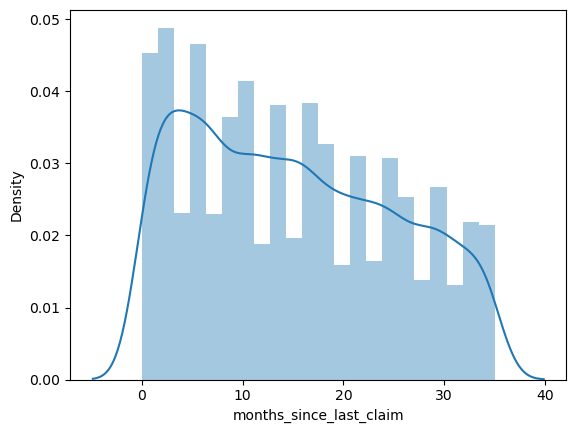

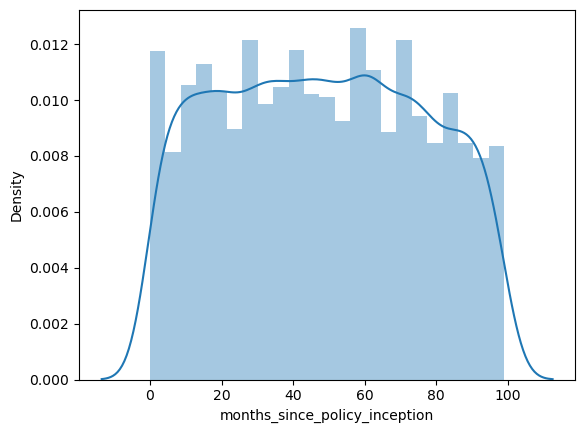

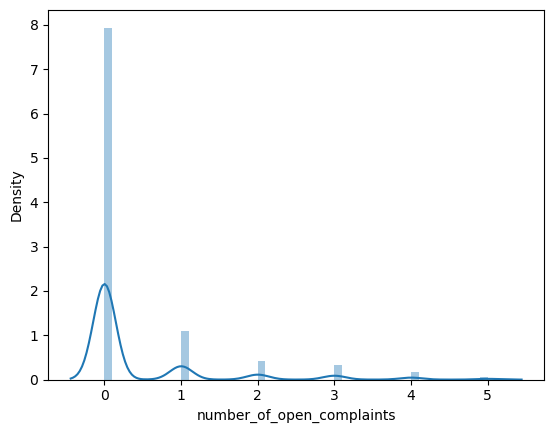

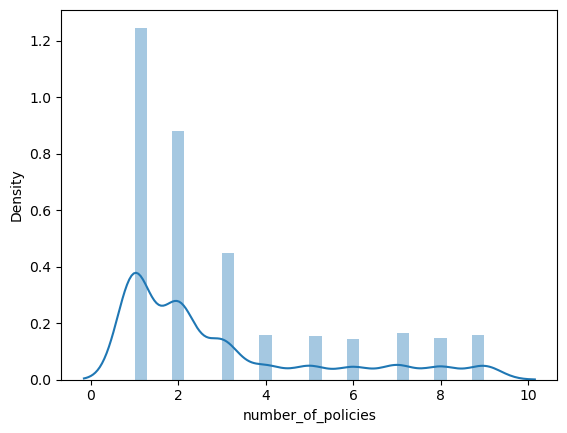

In [36]:
# 8 Create a function to plot every discrete variable. 
# https://seaborn.pydata.org/generated/seaborn.distplot.html
for column in numerical[discrete_list]:
    sns.distplot(numerical[column])
    plt.show()

In [37]:
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
# Do the same with the continuous variables 
# The code loops through each column in the numerical dataframe that is included in the continuous_lst list, and plots a histogram of the values in each column using the sns.histplot function from the seaborn library. The plt.show() function is used after each plot to display the plot.
# Visualizing the distribution of values for each column in the continuous_lst list. The histograms could provide information about the distribution of values and the presence of outliers, which might be useful in selecting appropriate preprocessing techniques for machine learning models.

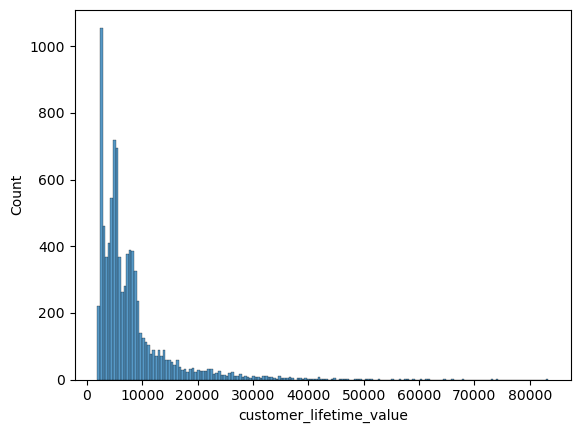

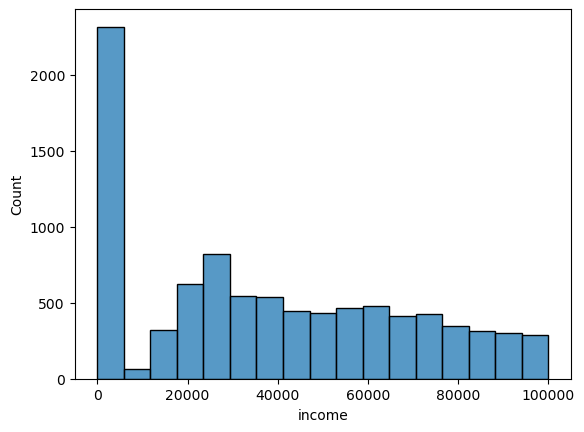

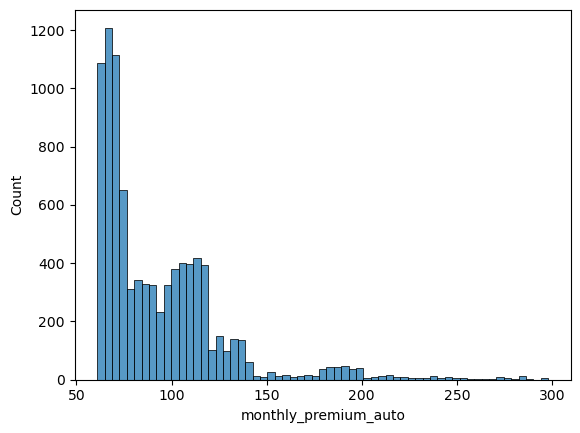

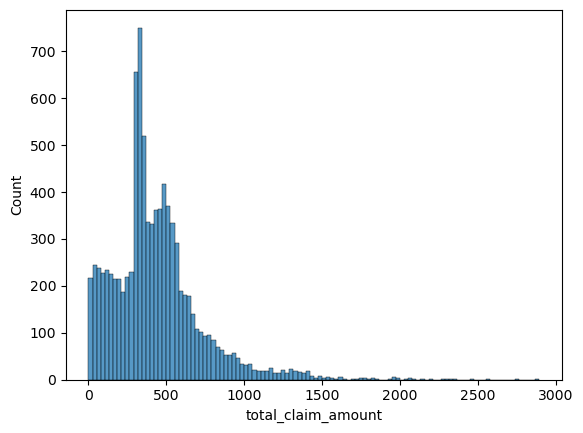

In [38]:
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
# https://seaborn.pydata.org/generated/seaborn.histplot.html
for column in numerical[continuous_list]:
    sns.histplot(numerical[column])
    plt.show()

In [39]:
# 9 Comment what you can see in the plots.
# OUTLIERS SHOULD ARE PRESENT AND SHOULD BE TREATED BELOW.

In [40]:
# The code loops through each column in the numerical dataframe that is included in the continuous_lst list, and plots a boxplot of the values in each column using the sns.boxplot function from the seaborn library. The plt.show() function is used after each plot to display the plot.
# CODE  IS used to visualize the distribution of values for each column in the continuous_lst list. The boxplots  provides information about the distribution of values, including the median, quartiles, and OUTLIERS, which might be useful in selecting appropriate preprocessing techniques for machine learning models
# IT IS NECESSARY TO SEE AND POINT OUT THE OUTLIERS

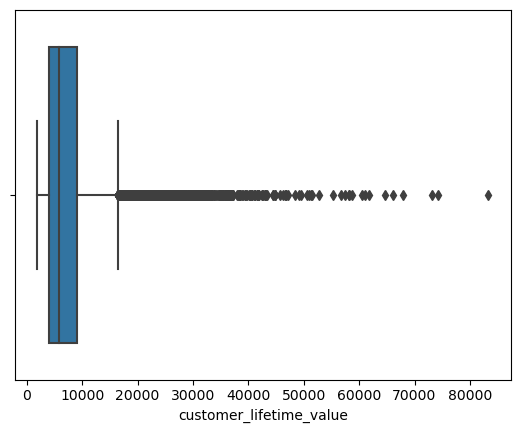

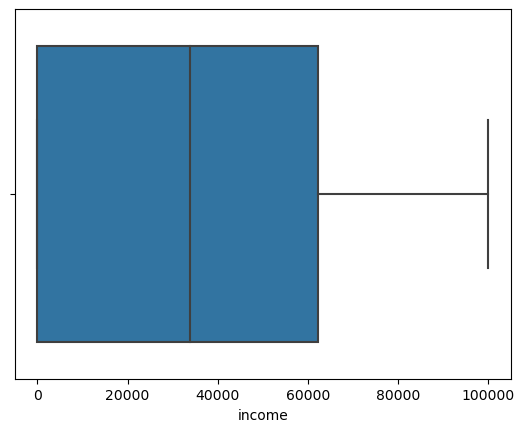

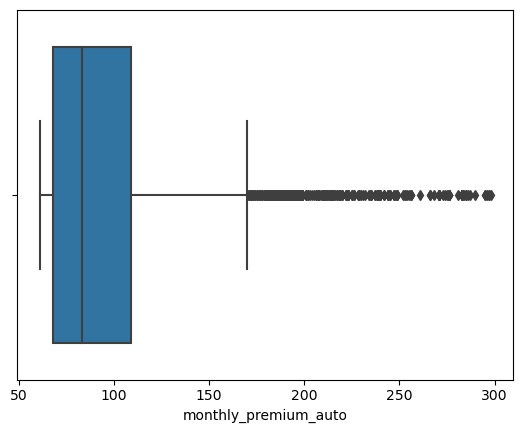

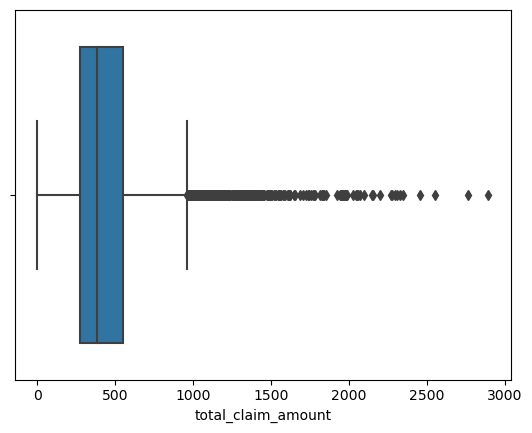

In [41]:
# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
for column in numerical[continuous_list]:
    sns.boxplot(numerical[column])
    plt.show()

In [42]:
# This function takes a column of values (column) as input and returns a list of outliers in that column. The function uses the interquartile range (IQR) method to detect outliers. Here's how it works:
# The first step is to compute the first quartile (q1) and third quartile (q3) of the sorted values in the column. The first and third quartile are used to compute the IQR.
# The IQR is computed as the difference between q3 and q1.
# Based on the IQR, the lower and upper bounds are computed as q1 - (1.5 * IQR) and q3 + (1.5 * IQR), respectively.
# The outliers in the column are then identified as those values that are less than or equal to the lower bound or greater than or equal to the upper bound.
# The list of outliers is returned as the output of the function.
# Detecting outliers in a column of values and returning a list of the outlier values.

In [43]:
# 11 Did you find outliers? Comment what you will do with them.
# https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe?noredirect=1&lq=1

def detect_outlier(column):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(column), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
 
    outliers = [x for x in column if x <= lower_fence or x >= upper_fence]
 
    return outliers

In [44]:
# This code applies the detect_outlier function to two columns from the numerical data frame: total_claim_amount and monthly_premium_auto. It computes the list of outliers for each column and saves them in two variables, tca_outliers and mpa_outliers.

In [45]:
# input data
total_claim_amount_outliers = detect_outlier(numerical['total_claim_amount'])
monthly_premium_auto_outliers = detect_outlier(numerical['monthly_premium_auto'])

In [46]:
# This code computes the length of the mpa_outliers list, which represents the number of outliers in the monthly_premium_auto column.

In [47]:
len(monthly_premium_auto_outliers)

430

In [48]:
# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [49]:
# This code computes the number of missing values in each column of the numerical data frame. It returns a series where each element represents the sum of missing values in the corresponding column.

In [50]:
numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [51]:
categorical.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64